In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})
from matplotlib import rc
# rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator
#
# from networks_JFR import *
from copy import deepcopy

In [4]:
Unc = np.genfromtxt('pot_db_rcm-0.5_eps-10_epsssm-0.05_epsdb-5.0.dat')
Uhp = np.genfromtxt('pot_hp_eps-10.dat')

In [5]:
Ur12 = deepcopy(Unc)
for r in range(Unc.shape[0]):
    Ur12[r,1] = Unc[r,0]**-12

In [6]:
C12_N = 0.970906
C12_C = 1.677510
C12_O = 0.318366

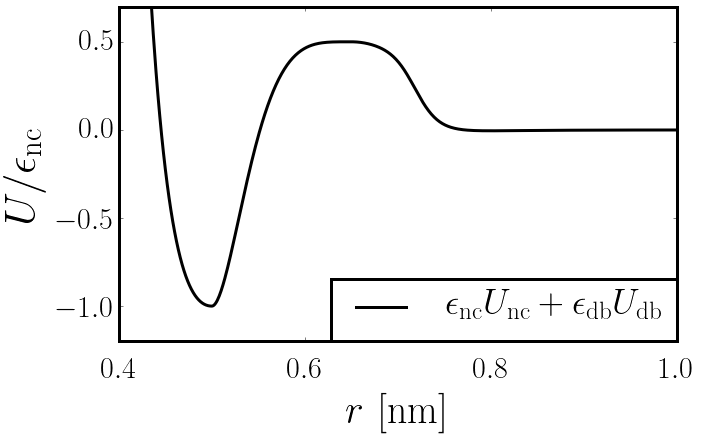

In [24]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
label = r'$\epsilon_{\rm nc} U_{\rm nc} + \epsilon_{\rm db} U_{\rm db}$'
plt.plot(Unc[:,0],Unc[:,1]/10.,color='k',linewidth=3,label=label)
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.xlabel(r'$r \,\, [\rm{nm}]$',fontsize='40',labelpad=10)#,fontweight='bold')
plt.ylabel(r'$U / \epsilon_{\rm nc}$',fontsize='44',labelpad=5)
#plt.yticks([-10,-5,0,5],[r'$-\epsilon_{\rm nc}$','',r'$0$',r'$\epsilon_{\rm db}$'],fontsize='40')
plt.yticks([-1,-0.5,0,0.5],fontsize='30')
plt.xticks(np.arange(5)*0.2+0.4,fontsize='30')
ax.tick_params(axis='x', which='major', pad=15)
# legend
# plt.legend()
legend = plt.legend(fontsize='36',loc='upper center', bbox_to_anchor=(0.69, 0.239))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='bold')
#
plt.ylim([-1.2,0.7])
plt.xlim([0.4,1.])
plt.savefig('Unc-db_py.svg', format='svg', dpi=800)
plt.savefig('Unc-db_py.eps', format='eps', dpi=800)
plt.show()

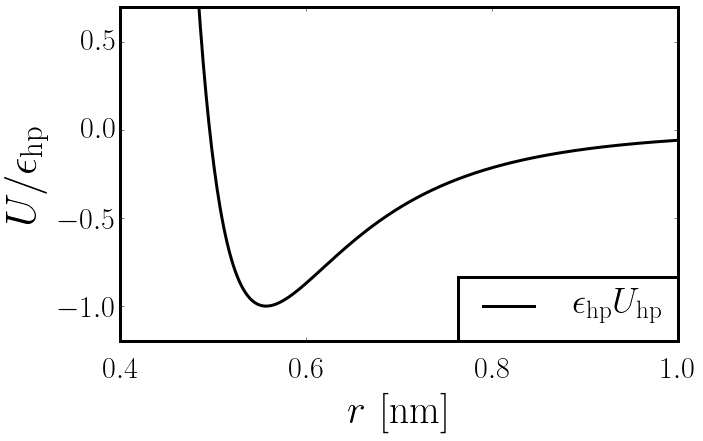

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
label = r'$\epsilon_{\rm hp} U_{\rm hp}$'
plt.plot(Uhp[:,0],Uhp[:,1]/10.,color='k',linewidth=3,label=label)
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.xlabel(r'$r \,\, [\rm{nm}]$',fontsize='40',labelpad=10)#,fontweight='bold')
plt.ylabel(r'$U / \epsilon_{\rm hp}$',fontsize='44',labelpad=5)
#plt.yticks([-10,-5,0,5],[r'$-\epsilon_{\rm hp}$','',r'$0$',r''],fontsize='40')
plt.yticks([-1,-0.5,0,0.5],fontsize='30')
plt.xticks(np.arange(5)*0.2+0.4,fontsize='30')
ax.tick_params(axis='x', which='major', pad=15)
# legend
# plt.legend()
legend = plt.legend(fontsize='36',loc='upper center', bbox_to_anchor=(0.802, 0.245))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='bold')
#
plt.ylim([-1.2,0.7])
plt.xlim([0.4,1.])
plt.savefig('Uhp_py.svg', format='svg', dpi=800)
plt.savefig('Uhp_py.eps', format='eps', dpi=800)
plt.show()

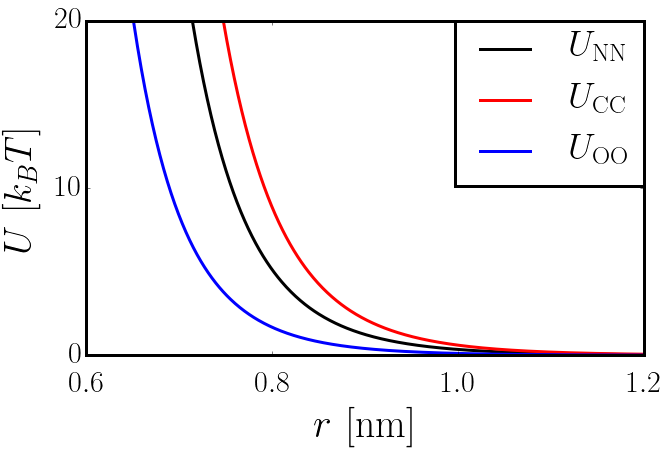

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
label = r'$U_{\rm NN}$'
plt.plot(Ur12[:,0],C12_N*Ur12[:,1]/(2.771),color='k',linewidth=3,label=label)
label = r'$U_{\rm CC}$'
plt.plot(Ur12[:,0],C12_C*Ur12[:,1]/(2.771),color='r',linewidth=3,label=label)
label = r'$U_{\rm OO}$'
plt.plot(Ur12[:,0],C12_O*Ur12[:,1]/(2.771),color='b',linewidth=3,label=label)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.xlabel(r'$r \,\, [\rm{nm}]$',fontsize='40',labelpad=10)#,fontweight='bold')
plt.ylabel(r'$U \,\, [k_BT]$',fontsize='38',labelpad=10)
plt.yticks([0,10,20],fontsize='30')
plt.xticks(np.arange(5)*0.2+0.4,fontsize='30')
ax.tick_params(axis='x', which='major', pad=15)
# legend
# plt.legend()
legend = plt.legend(fontsize='36',loc='upper center', bbox_to_anchor=(0.83, 1.052))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='bold')
#
plt.ylim([0.,20.])
plt.xlim([0.6,1.2])
plt.savefig('Uwca_py.svg', format='svg', dpi=800)
plt.savefig('Uwca_py.eps', format='eps', dpi=800)
plt.show()